# UK-Accidents-2013
### The accident file provides detailes about the circumstances of accidents that had happened during year 2013 in the UK such as weather, location lat/long, area type, road type,date, time, day of week and much more…
### And the Vehicle csv file provide detailes about the circumstances of the accidents that had happened in the same year (2013) , as after cleaning and transforming the accident csv file we integrated them together, Then we integrate the jupyter notebook in a data pipeline using (Airfolw) and we created our own ETL
### The vehicle file contains type, age of driver, sex of driver, age of vehicle, engine type, journey purpose and much more…
### These files provide detailed road safety data about the circumstances of personal injury road accidents in 2013.

## EDA

In [1]:
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
columns_data_types = {
    'accident_index': object,
    'accident_year': int,
    'accident_reference': object,
    'location_easting_osgr': int,
    'location_northing_osgr': int,
    'longitude': float,
    'latitude': float,
    'police_force': object,
    'accident_severity': object,
    'number_of_vehicles': int,
    'number_of_casualties': int,
    'day_of_week': object,
    'time': object,
    'local_authority_district': object,
    'local_authority_ons_district': object,
    'local_authority_highway': object,
    'first_road_class': object,
    'first_road_number': object,
    'road_type': object,
    'speed_limit': int,
    'junction_detail': object,
    'junction_control': object,
    'second_road_class': object,
    'second_road_number': object,
    'pedestrian_crossing_human_control': object,
    'pedestrian_crossing_physical_facilities': object,
    'light_conditions': object,
    'weather_conditions': object,
    'road_surface_conditions': object,
    'special_conditions_at_site': object,
    'carriageway_hazards': object,
    'urban_or_rural_area': object,
    'did_police_officer_attend_scene_of_accident': object,
    'trunk_road_flag': object,
    'lsoa_of_accident_location': object
}

In [4]:
df = pd.read_csv('2013/2013_Accidents_UK.csv', parse_dates=['date'],  infer_datetime_format=True,\
                 dtype=columns_data_types, index_col='accident_index')

In [5]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412.0,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,first_road_class is C or Unclassified. These r...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851


Replacing all missing values with Nan

In [6]:
df.replace(['Missing', 'NA', 'Data missing or out of range'], np.nan, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138660 entries, 201301BS70003 to 2013984142813
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_year                                138660 non-null  int64         
 1   accident_reference                           138660 non-null  object        
 2   location_easting_osgr                        138660 non-null  int64         
 3   location_northing_osgr                       138660 non-null  int64         
 4   longitude                                    138660 non-null  float64       
 5   latitude                                     138660 non-null  float64       
 6   police_force                                 138660 non-null  object        
 7   accident_severity                            138660 non-null  object        
 8   number_of_vehicles                           13866

In [8]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,138660.0,138660.000000,1.386600e+05,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000
mean,2013.0,444570.930009,2.937771e+05,-1.364462,52.531577,1.823980,1.324607,38.529064
std,0.0,95656.846984,1.609015e+05,1.405178,1.448954,0.726114,0.801197,13.946743
min,2013.0,66435.000000,1.029000e+04,-7.489410,49.912941,1.000000,1.000000,20.000000
25%,2013.0,381530.000000,1.765900e+05,-2.277468,51.475138,1.000000,1.000000,30.000000
50%,2013.0,448420.000000,2.491200e+05,-1.286932,52.127021,2.000000,1.000000,30.000000
75%,2013.0,525870.000000,3.931262e+05,-0.185856,53.432789,2.000000,1.000000,50.000000
max,2013.0,655304.000000,1.183525e+06,1.758722,60.532880,67.000000,70.000000,70.000000


In [9]:
df['first_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     51010
1                                                                                                        1612
6                                                                                                        1419
4                                                                                                        1293
5                                                                                                         871
                                                                                                        ...  
8883                                                                                                        1
853                                                                                                         1
9039                                                                                                        1
9091      

In [10]:
df['second_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     62318
1.0                                                                                                       303
4.0                                                                                                       268
6.0                                                                                                       207
5.0                                                                                                       186
                                                                                                        ...  
6428.0                                                                                                      1
6376.0                                                                                                      1
661.0                                                                                                       1
6151.0    

In [11]:
df['first_road_class'].value_counts()

A               64423
Unclassified    38990
B               17830
C               12020
Motorway         4983
A(M)              414
Name: first_road_class, dtype: int64

In [12]:
df['second_road_class'].value_counts()

-1              55884
Unclassified    55719
A               13890
C                6599
B                5576
Motorway          905
A(M)               87
Name: second_road_class, dtype: int64

In [13]:
df['lsoa_of_accident_location'].value_counts()

-1           9764
E01032739     206
E01004736     155
E01033595     108
E01004689      79
             ... 
E01019523       1
E01019418       1
E01019625       1
E01019642       1
W01000479       1
Name: lsoa_of_accident_location, Length: 28786, dtype: int64

Replacing first roads with no official number with 0 

In [14]:
df['first_road_number'].replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',\
                                '0', inplace=True)

Replacing second roads with no official number with 0

In [15]:
df['second_road_number'].replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',\
                                 '0', inplace=True)

Modifying columns datatypes: first_road_number, second_road_number, speed_limit

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138660 entries, 201301BS70003 to 2013984142813
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_year                                138660 non-null  int64         
 1   accident_reference                           138660 non-null  object        
 2   location_easting_osgr                        138660 non-null  int64         
 3   location_northing_osgr                       138660 non-null  int64         
 4   longitude                                    138660 non-null  float64       
 5   latitude                                     138660 non-null  float64       
 6   police_force                                 138660 non-null  object        
 7   accident_severity                            138660 non-null  object        
 8   number_of_vehicles                           13866

In [17]:
df.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [18]:
df['police_force'].nunique

<bound method IndexOpsMixin.nunique of accident_index
201301BS70003      Metropolitan Police
201301BS70005      Metropolitan Police
201301BS70006      Metropolitan Police
201301BS70007      Metropolitan Police
201301BS70009      Metropolitan Police
                         ...          
2013984141713    Dumfries and Galloway
2013984142113    Dumfries and Galloway
2013984142213    Dumfries and Galloway
2013984142413    Dumfries and Galloway
2013984142813    Dumfries and Galloway
Name: police_force, Length: 138660, dtype: object>

In [19]:
df.isna().sum()

accident_year                                      0
accident_reference                                 0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                     

In [20]:
df['first_road_number'] = df['first_road_number'].astype(int)
df['second_road_number'] = df['second_road_number'].astype(float) 
df['speed_limit'] = df['speed_limit'].astype(int)

# Questions

## Q1- What is the most day of week have accidents??

In [21]:
day_acc=df.day_of_week.value_counts()
day_acc

Friday       23044
Tuesday      21257
Thursday     21186
Wednesday    20461
Monday       19831
Saturday     18027
Sunday       14854
Name: day_of_week, dtype: int64

In [22]:
most_day_acc = day_acc.sort_values(ascending=False)[:1]
most_day_acc

Friday    23044
Name: day_of_week, dtype: int64

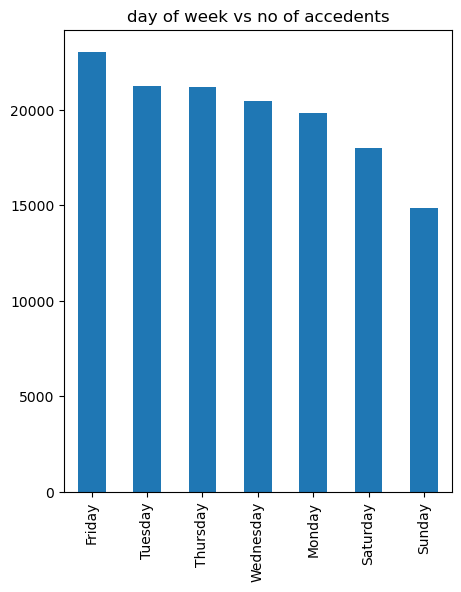

In [23]:
df['day_of_week'].value_counts().plot(kind='bar',figsize=(5,6),title='day of week vs no of accedents')
# Show the plot
plt.show()

## Q2- What is the relation between accident severity  and number of casualities ?

In [24]:
df.accident_severity.value_counts()

Slight     117467
Serious     19585
Fatal        1608
Name: accident_severity, dtype: int64

In [25]:
df.groupby(['accident_severity', 'number_of_casualties'])['number_of_casualties'].count()

accident_severity  number_of_casualties
Fatal              1                         935
                   2                         364
                   3                         157
                   4                          70
                   5                          42
                   6                          19
                   7                          11
                   8                           3
                   9                           2
                   11                          1
                   12                          1
                   17                          1
                   22                          1
                   29                          1
Serious            1                       14918
                   2                        2948
                   3                        1021
                   4                         374
                   5                         176
                   6         

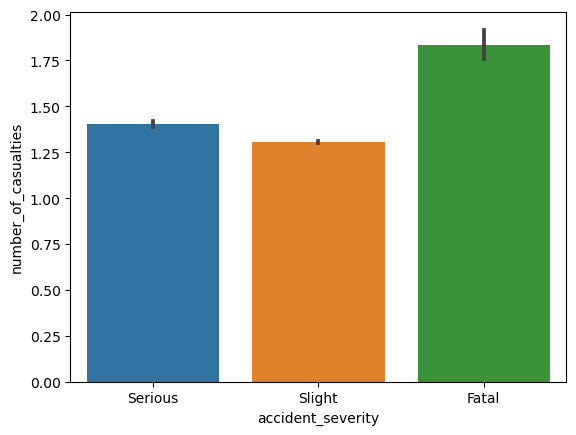

In [26]:
sns.barplot(x = 'accident_severity',
            y = 'number_of_casualties',
            data = df)
 
# Show the plot
plt.show()

## Q3- How many times police attend scene according to severity degree of accidents?

In [27]:
df['did_police_officer_attend_scene_of_accident'].unique()

array(['Yes', 'No', nan], dtype=object)

In [28]:
df.did_police_officer_attend_scene_of_accident.value_counts()

Yes    113358
No      25301
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [29]:
df.local_authority_district.value_counts()

Birmingham                   2445
Leeds                        1789
Westminster                  1514
Cornwall                     1287
Lambeth                      1169
                             ... 
Clackmannanshire               69
London Airport (Heathrow)      31
Shetland Islands               25
Orkney Islands                 23
Western Isles                  21
Name: local_authority_district, Length: 380, dtype: int64

In [30]:
s = df.groupby(['did_police_officer_attend_scene_of_accident','local_authority_district'])['local_authority_district'].count().sort_values(ascending = False)
s['No']

local_authority_district
Birmingham                   632
Leeds                        337
Bristol, City of             289
Brighton and Hove            272
Sheffield                    264
                            ... 
London Airport (Heathrow)      4
Shetland Islands               4
Orkney Islands                 3
Perth and Kinross              3
Merthyr Tydfil                 2
Name: local_authority_district, Length: 365, dtype: int64

In [31]:
df_police_district=pd.DataFrame(s['No'].index[0:10])

In [32]:
df_police_district['did_police_officer_attend_scene_of_accident'] = s['No'].values[0:10]

In [33]:
df_police_district

,local_authority_district,did_police_officer_attend_scene_of_accident
0,Birmingham,632
1,Leeds,337
2,"Bristol, City of",289
3,Brighton and Hove,272
4,Sheffield,264
5,"Kingston upon Hull, City of",263
6,"Edinburgh, City of",260
7,Nottingham,251
8,Leicester,248
9,Glasgow City,236


 This shows which district where most police didn't attend the scene of the accident.

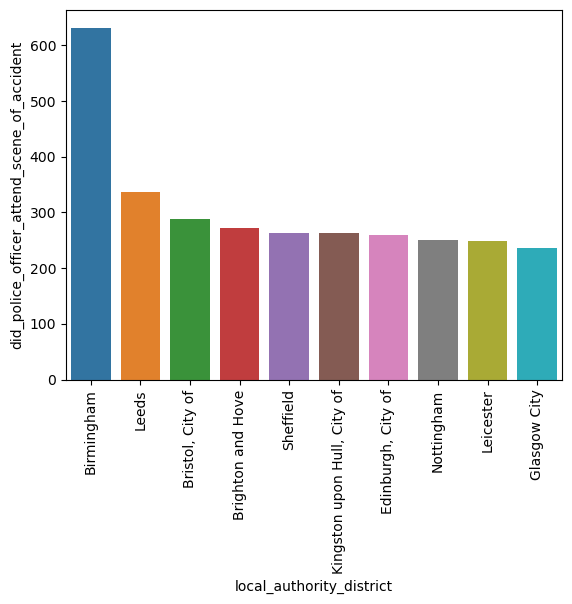

In [34]:
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy']
sns.barplot(x = 'local_authority_district',
            y = 'did_police_officer_attend_scene_of_accident',
            data = df_police_district )
plt.xticks(rotation=90)

 
# Show the plot
plt.show()

## Q4- What type of road flags frequently witnesses accidents?

In [35]:
df['trunk_road_flag'].value_counts()

Non-trunk                                    113646
Trunk (Roads managed by Highways England)     10140
Name: trunk_road_flag, dtype: int64

In [36]:
non_trunk_accidents = df[(df['trunk_road_flag'] == 'Non-trunk') & \
                     (df['trunk_road_flag'] != np.nan)].groupby(['accident_severity'])\
                     ['accident_severity'].count()

In [37]:
trunk_accidents = df[(df['trunk_road_flag'] == 'Trunk (Roads managed by Highways England)') & \
                 (df['trunk_road_flag'] != np.nan) ].groupby(['accident_severity'])\
                 ['accident_severity'].count()

In [38]:
non_trunk_accidents

accident_severity
Fatal       1119
Serious    16060
Slight     96467
Name: accident_severity, dtype: int64

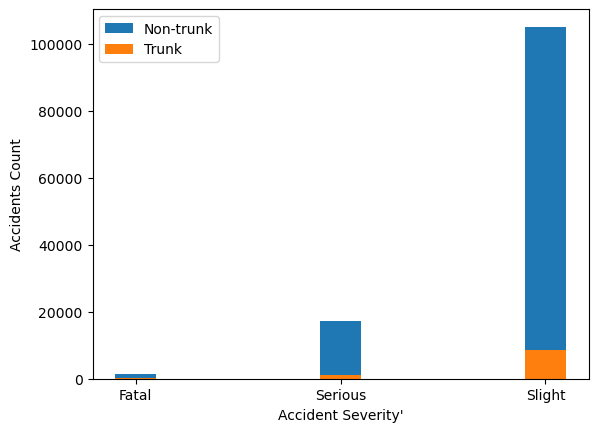

In [39]:
fig_4, axs_5 = plt.subplots(1,1)
axs_5.set_xlabel("Accident Severity'")
axs_5.set_ylabel('Accidents Count')
axs_5.bar(np.arange(len(non_trunk_accidents.index)),non_trunk_accidents,width=0.2,label="Non-trunk",bottom=trunk_accidents) 
axs_5.bar(np.arange(len(trunk_accidents.index)),trunk_accidents,width=0.2,label="Trunk")
plt.xticks(np.arange(len(non_trunk_accidents.index)), [f"{i}" for i in non_trunk_accidents.index])
axs_5.legend(loc=0)

## Q5- What might be the potiential reasons behind large number of accidents in non-trunk roads?

In [40]:
df_non_trunk_roads = df[df['trunk_road_flag'] == 'Non-trunk']
df_non_trunk_casuals = df_non_trunk_roads[['road_type', 'speed_limit', \
                       'junction_detail', 'junction_control', 'pedestrian_crossing_human_control', \
                       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', \
                       'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',\
                       'urban_or_rural_area', 'first_road_class']]
df_non_trunk_casuals.index = df_non_trunk_casuals['road_type']

In [41]:
df_non_trunk_casuals.head()

,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,first_road_class
road_type,,,,,,,,,,,,,
Single carriageway,Single carriageway,30,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,A
Single carriageway,Single carriageway,30,Crossroads,Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,A
Single carriageway,Single carriageway,30,Crossroads,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,B
Single carriageway,Single carriageway,30,Crossroads,Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,B
One way street,One way street,30,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,A


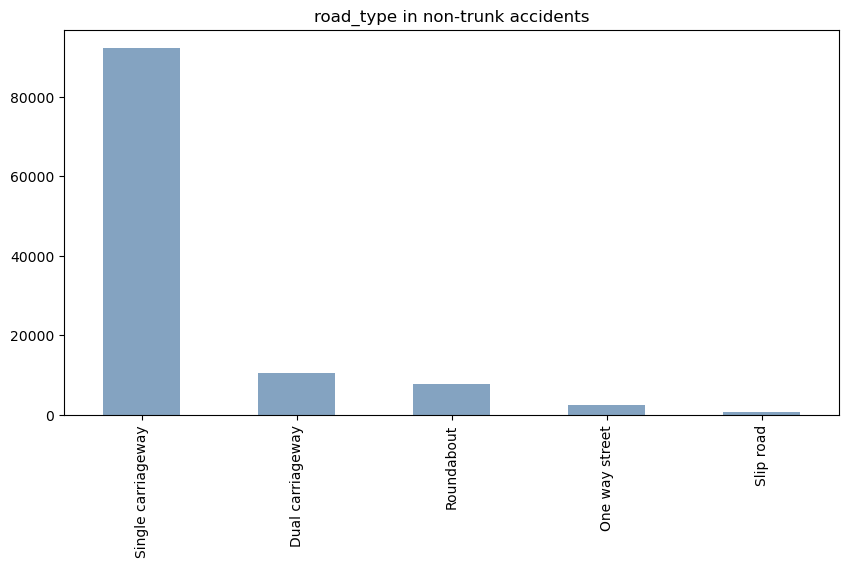

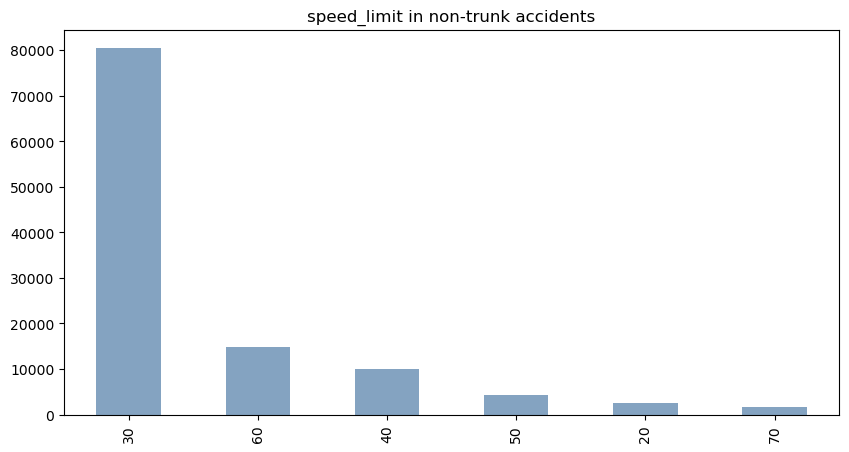

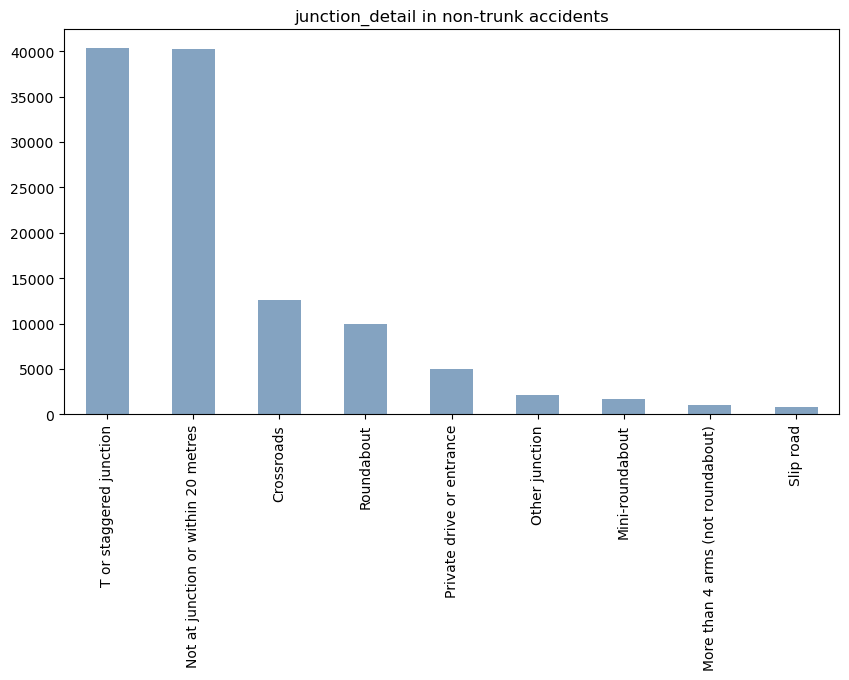

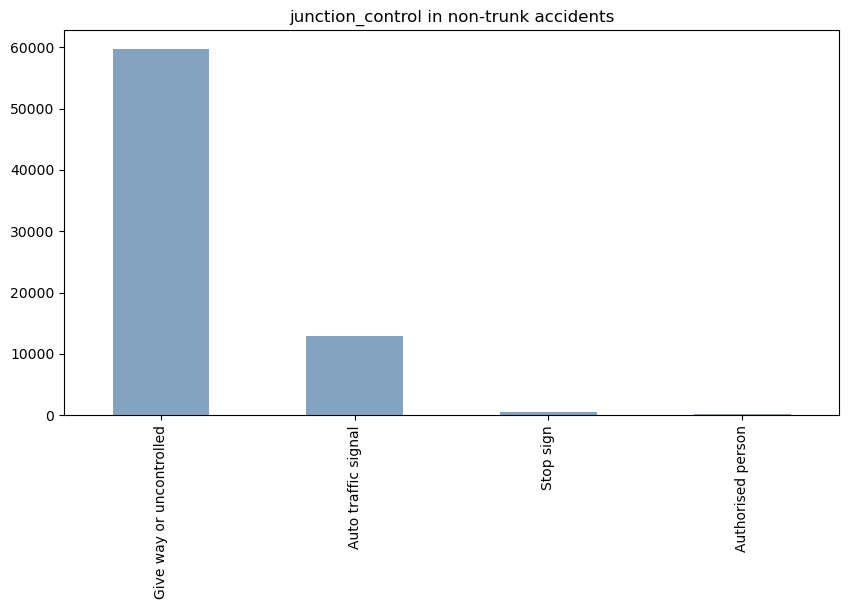

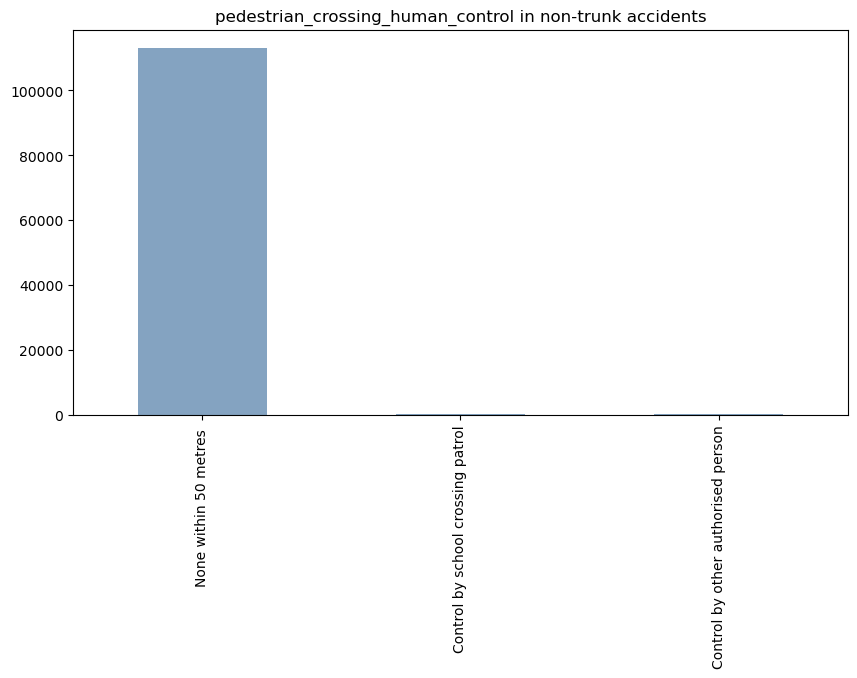

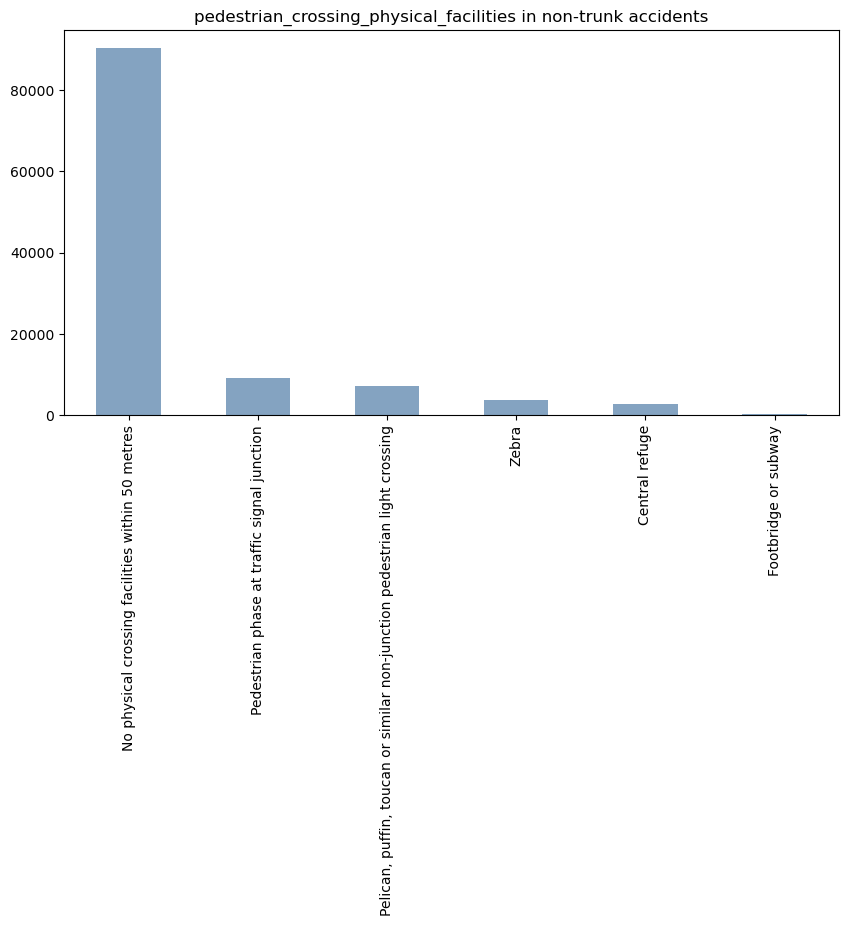

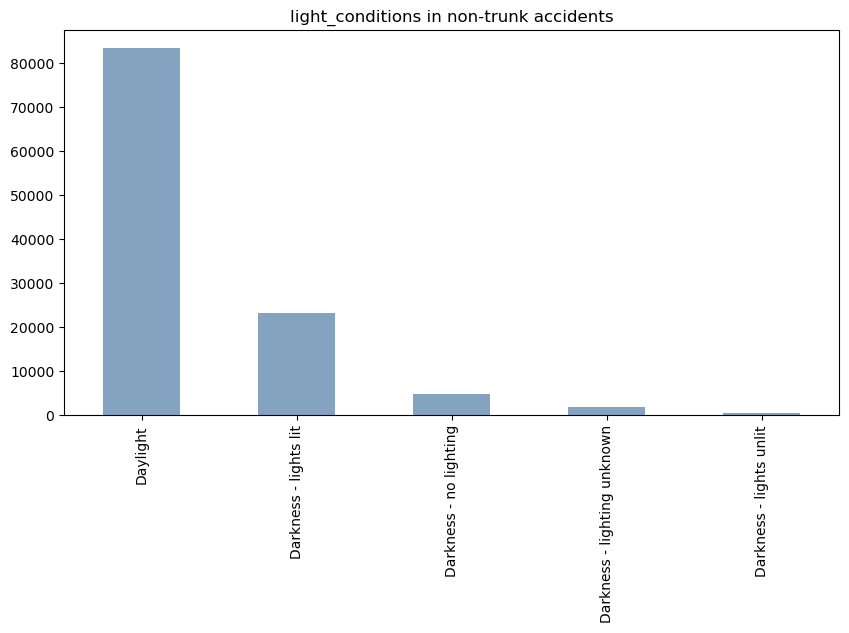

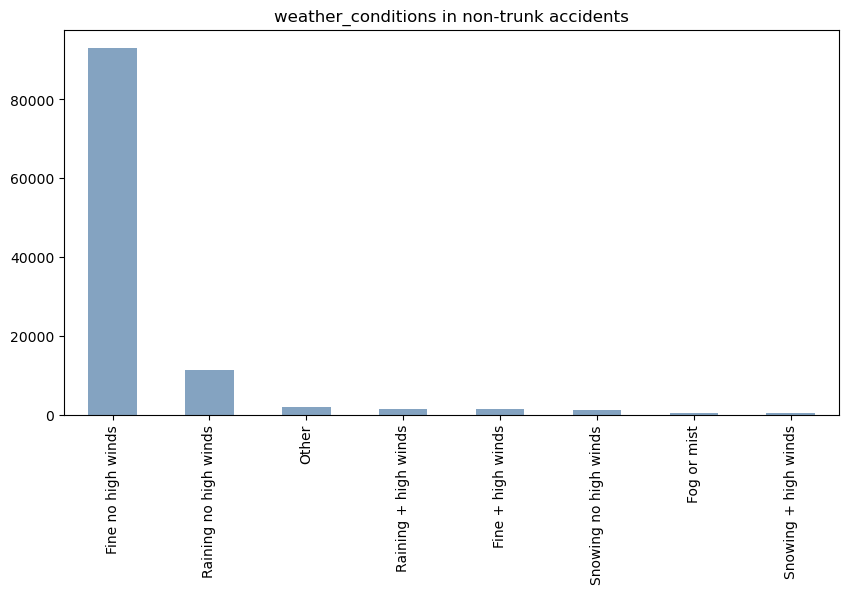

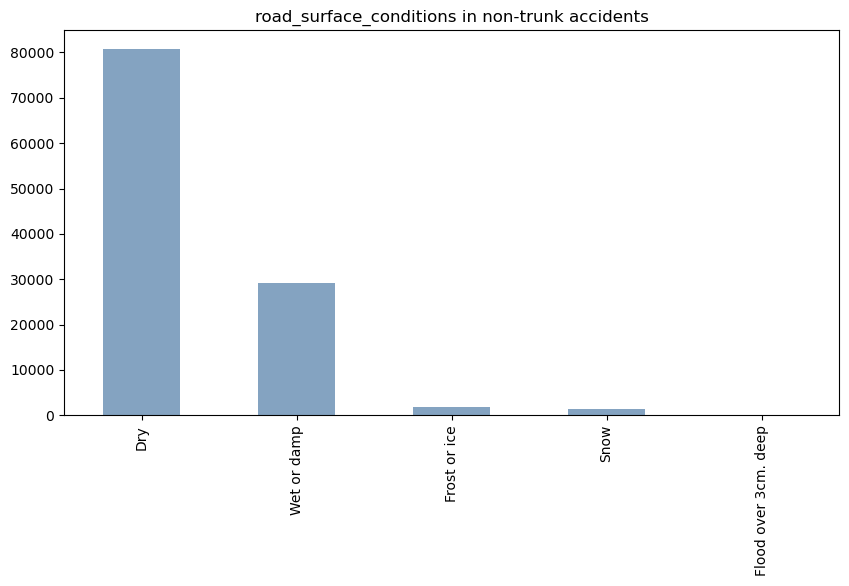

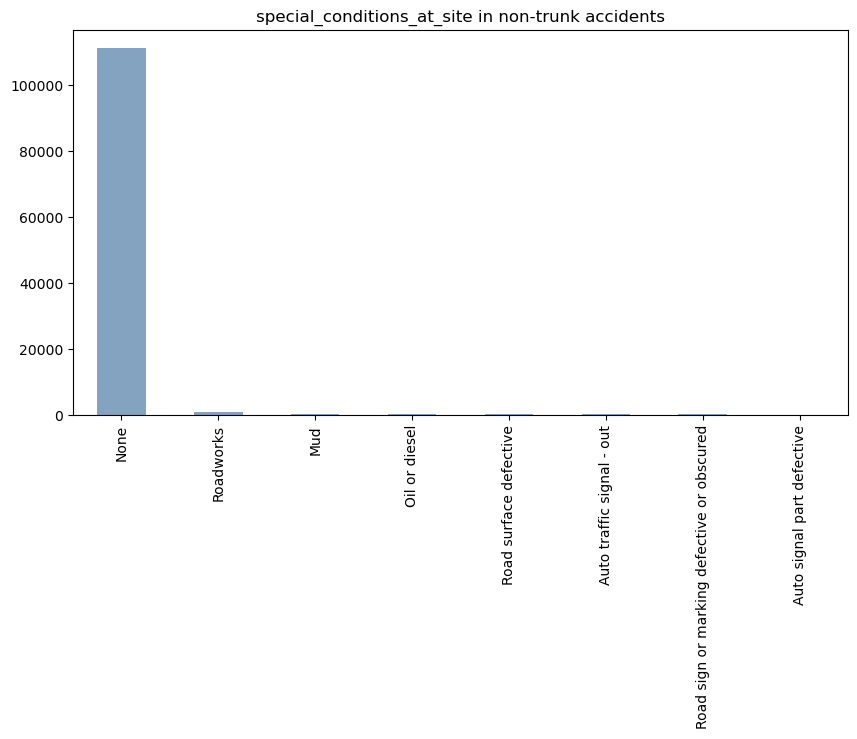

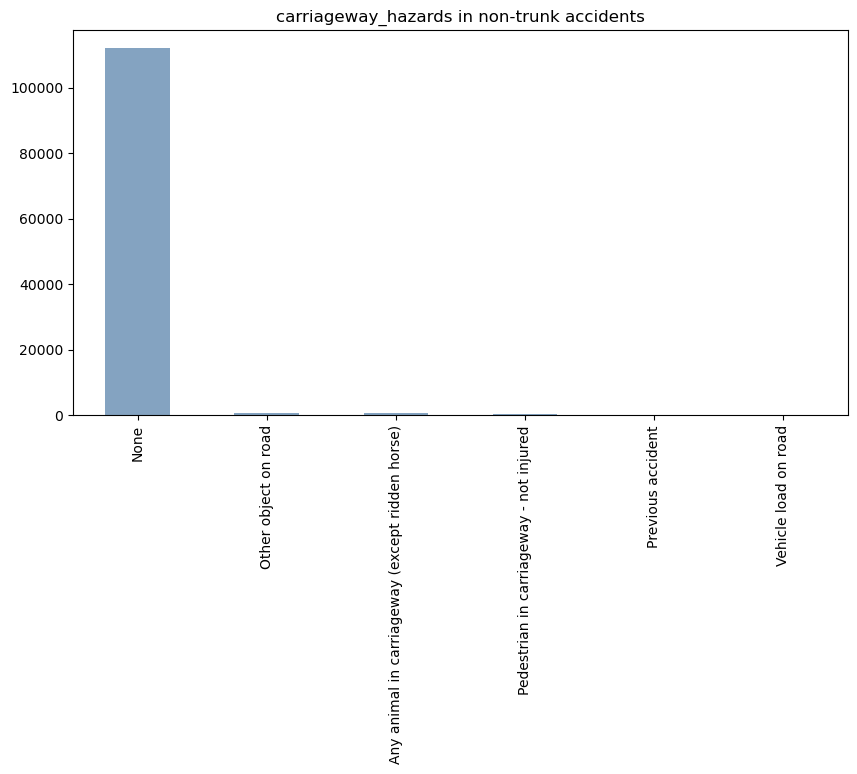

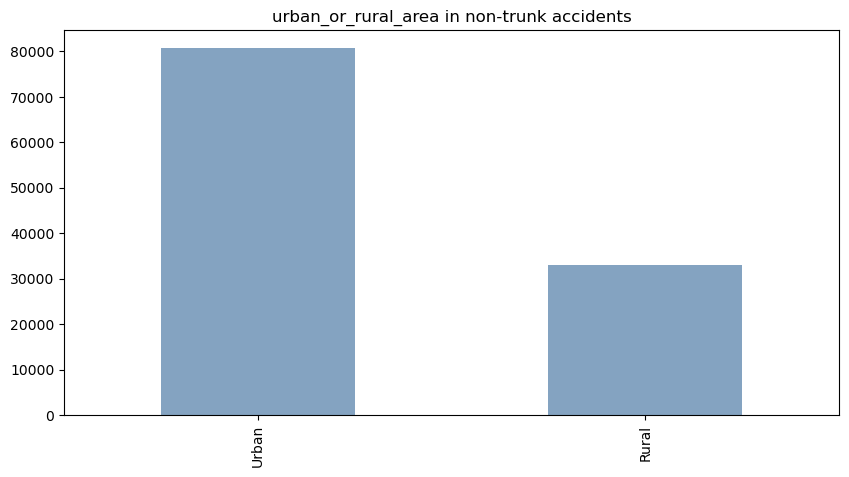

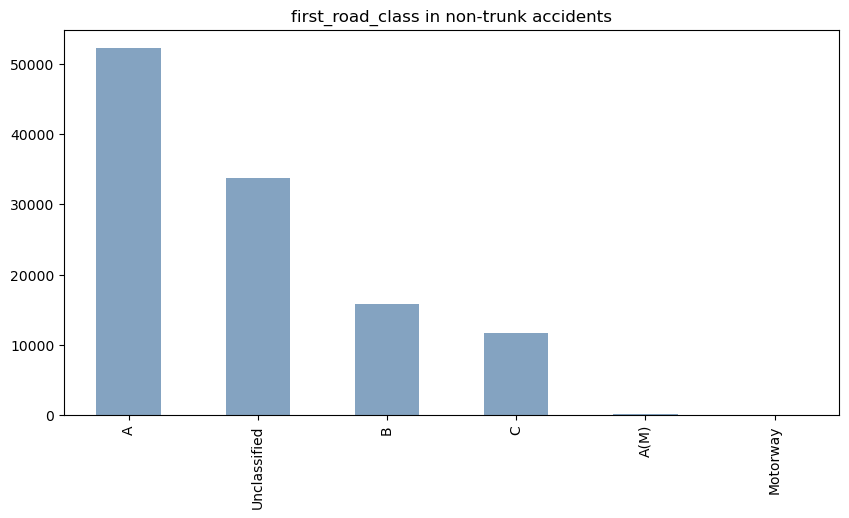

In [42]:
for i in df_non_trunk_casuals:
    df_non_trunk_casuals[i].value_counts().plot(kind ='bar', figsize=(10,5), title='{} in non-trunk accidents'.format(i), color=(0.2, 0.4, 0.6, 0.6))
    plt.show()

## Q6- How many residents/households are there in each accidents's neighborhood ?

Since lsoa represents the number of residents (1000-3000) and the number of households (400-1200) as found upon https://ocsi.uk/2019/03/18/lsoas-leps-and-lookups-a-beginners-guide-to-statistical-geographies/. So breaking down the column into two other columns: the first 4 digits after E0 represents residents and the rest represents the households.

In [43]:
df_lsoa_split = df['lsoa_of_accident_location'].str[2:]

In [44]:
df_lsoa_split

accident_index
201301BS70003    1002844
201301BS70005    1002821
201301BS70006    1002878
201301BS70007    1002831
201301BS70009    1002851
                  ...   
2013984141713           
2013984142113           
2013984142213           
2013984142413           
2013984142813           
Name: lsoa_of_accident_location, Length: 138660, dtype: object

In [45]:
lsoa_residents_arr = []
lsoa_households_arr = []
for i in df_lsoa_split.iteritems():
    if i[1] != '-1':
        lsoa_residents_arr.append(i[1][0:4])
        lsoa_households_arr.append(i[1][4:])
    else:
        lsoa_residents_arr.append('-1')
        lsoa_households_arr.append('-1')
    
df['number_of_residents'] = lsoa_residents_arr
df['number_of_households'] = lsoa_households_arr

In [46]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412.0,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851


## Q7- What type of area witnessed more accidents ? and what was its road type?

In [47]:
df.urban_or_rural_area.value_counts()

Urban    90000
Rural    48660
Name: urban_or_rural_area, dtype: int64

Urban was the highest area

In [48]:
urban_area = df[df['urban_or_rural_area']== 'Urban']

In [49]:
urban_area['road_type'].value_counts()

Single carriageway    70605
Dual carriageway      10059
Roundabout             5930
One way street         2528
Slip road               568
Name: road_type, dtype: int64

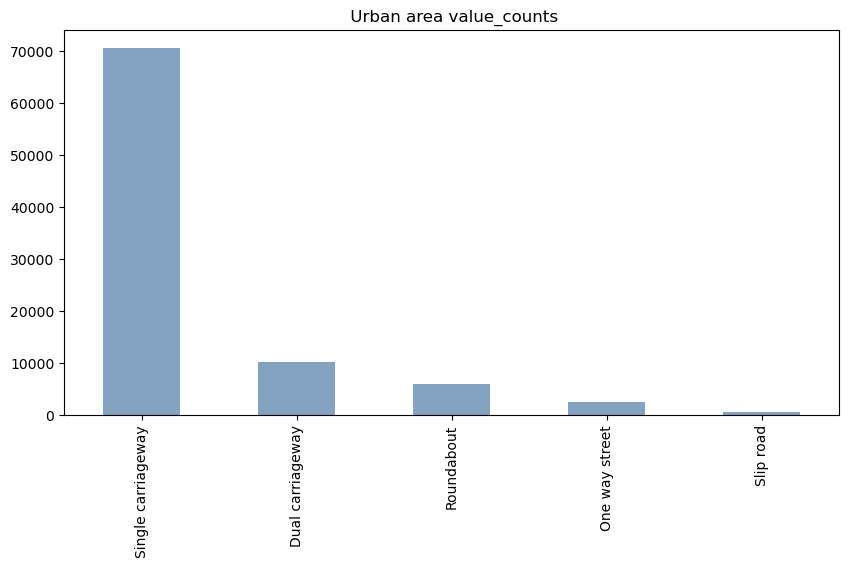

In [50]:
urban_area['road_type'].value_counts().plot(kind ='bar', figsize=(10,5), title=' Urban area value_counts'.format(i), color=(0.2, 0.4, 0.6, 0.6))
plt.show()

## Data Cleaning

#### Second road number column

Second_road_number has only one missing value corresponding to an identified second_road_class.(MCAR)

In [51]:
df_second_road_nan = df[(df['second_road_number'].isna()) \
                                  & (df['second_road_class'].notna())
                                  & (df['second_road_class'] != '-1')]
df_second_road_nan

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013930000360,2013,930000360,339091,729257,-2.98976,56.451578,Tayside,Slight,2,2,2013-02-26,Tuesday,17:15,Dundee City,Dundee City,Dundee City,A,85,Dual carriageway,40,T or staggered junction,Give way or uncontrolled,A,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,NaN,-1,,


Since there is no similar accident to this one, so there is no way to know the second road number then we will drop it.

In [52]:
#shape of dataframe before dropping
df.shape

(138660, 37)

In [53]:
df.drop(df[(df['second_road_number'].isna()) & \
                               (df['second_road_class'].notna()) &
                               (df['second_road_class'] != '-1')].index, inplace = True)

In [54]:
#shape after dropping
df.shape

(138659, 37)

In [55]:
df[df['second_road_class'] == '-1']

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70019,2013,01BS70019,526790,177690,-0.175389,51.483906,Metropolitan Police,Slight,2,1,2013-01-14,Monday,09:35,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002845,1002,845
201301BS70024,2013,01BS70024,527500,177660,-0.165180,51.483476,Metropolitan Police,Slight,5,1,2013-01-20,Sunday,20:38,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Snowing no high winds,Snow,None,None,Rural,Yes,Non-trunk,E01002900,1002,900
201301BS70034,2013,01BS70034,525860,179280,-0.188209,51.498403,Metropolitan Police,Serious,2,1,2013-01-24,Thursday,20:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002890,1002,890
201301BS70054,2013,01BS70054,525270,178420,-0.197009,51.490805,Metropolitan Police,Slight,2,1,2013-09-02,Saturday,13:10,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002847,1002,847
201301BS70057,2013,01BS70057,525280,178780,-0.196737,51.494038,Metropolitan Police,Slight,2,1,2013-11-02,Monday,09:33,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4,Dual carriageway,40,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Snowing no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002851,1002,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013984138913,2013,984138913,308119,602826,-3.449145,55.310942,Dumfries and Galloway,Slight,1,1,2013-05-12,Thursday,06:49,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),74,Dual carriageway,70,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining + high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984139013,2013,984139013,338962,576280,-2.957564,55.077229,Dumfries and Galloway,Slight,1,1,2013-05-12,Thursday,09:27,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,7,Single carriageway,60,Not at junction or within 20 metres,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984139913,2013,984139913,315187,568784,-3.327624,55.006390,Dumfries and Galloway,Slight,1,1,2013-12-17,Tuesday,03:23

As shown above, for every accident took place in a single road, we have a NaN second road number which makes sense. So, we will turn every NaN in it into a (-1) which means there is no second road.

In [56]:
df[['second_road_number']] = df[['second_road_number']].fillna(value=-1)

In [57]:
df[df['second_road_class'] == '-1']

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70019,2013,01BS70019,526790,177690,-0.175389,51.483906,Metropolitan Police,Slight,2,1,2013-01-14,Monday,09:35,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002845,1002,845
201301BS70024,2013,01BS70024,527500,177660,-0.165180,51.483476,Metropolitan Police,Slight,5,1,2013-01-20,Sunday,20:38,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3212,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Snowing no high winds,Snow,None,None,Rural,Yes,Non-trunk,E01002900,1002,900
201301BS70034,2013,01BS70034,525860,179280,-0.188209,51.498403,Metropolitan Police,Serious,2,1,2013-01-24,Thursday,20:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002890,1002,890
201301BS70054,2013,01BS70054,525270,178420,-0.197009,51.490805,Metropolitan Police,Slight,2,1,2013-09-02,Saturday,13:10,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002847,1002,847
201301BS70057,2013,01BS70057,525280,178780,-0.196737,51.494038,Metropolitan Police,Slight,2,1,2013-11-02,Monday,09:33,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4,Dual carriageway,40,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Snowing no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002851,1002,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013984138913,2013,984138913,308119,602826,-3.449145,55.310942,Dumfries and Galloway,Slight,1,1,2013-05-12,Thursday,06:49,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A(M),74,Dual carriageway,70,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining + high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984139013,2013,984139013,338962,576280,-2.957564,55.077229,Dumfries and Galloway,Slight,1,1,2013-05-12,Thursday,09:27,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,7,Single carriageway,60,Not at junction or within 20 metres,NaN,-1,-1.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984139913,2013,984139913,315187,568784,-3.327624,55.006390,Dumfries and Galloway,Slight,1,1,2013-12-17,Tuesda

In [58]:
#changing second road number datatype to int
df['second_road_number'] = df['second_road_number'].astype(int)

#### Road Type column

Road type nan values can be classified as (MCAR).

In [59]:
df.groupby(['speed_limit', 'road_type'])['road_type'].count()

speed_limit  road_type         
20           Dual carriageway         51
             One way street          210
             Roundabout               64
             Single carriageway     2294
             Slip road                 3
30           Dual carriageway       5545
             One way street         2456
             Roundabout             5888
             Single carriageway    74856
             Slip road               382
40           Dual carriageway       3120
             One way street           35
             Roundabout             1460
             Single carriageway     6749
             Slip road               106
50           Dual carriageway       1703
             One way street            4
             Roundabout              490
             Single carriageway     3005
             Slip road               133
60           Dual carriageway        794
             One way street           39
             Roundabout              984
             Single carri

From above, we can notice that most roads with speed limit < 70 are Single carriageway but for roads with speed limit = 70, they are Dual carriageway.

In [60]:
df['road_type'] = df['road_type'].fillna(df['speed_limit']. \
                           map(lambda x: 'Single carriageway' if x<70 else 'Dual carriageway'))

#### Trunk road flag column

In [61]:
df[df['trunk_road_flag'].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201360P000033,2013,60P000033,332080,352420,-3.015045,53.064671,North Wales,Fatal,1,1,2013-01-01,Tuesday,00:33,Wrexham,Wrexham,Wrexham,A,541,Dual carriageway,70,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Rural,Yes,NaN,W01000375,1000,375
201360P000646,2013,60P000646,278110,369520,-3.826611,53.208715,North Wales,Slight,3,2,2013-01-01,Tuesday,16:00,Conwy,Conwy,Conwy,A,470,Single carriageway,60,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,NaN,W01000137,1000,137
201360P001020,2013,60P001020,326140,363850,-3.106305,53.166609,North Wales,Slight,1,1,2013-02-01,Wednesday,13:00,Flintshire,Flintshire,Flintshire,A,549,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No,NaN,W01000250,1000,250
201360P001027,2013,60P001027,330350,369070,-3.044481,53.214093,North Wales,Slight,1,1,2013-02-01,Wednesday,11:45,Flintshire,Flintshire,Flintshire,B,5129,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No,NaN,W01000283,1000,283
201360P001038,2013,60P001038,336150,351770,-2.954188,53.059332,North Wales,Slight,2,2,2013-02-01,Wednesday,13:55,Wrexham,Wrexham,Wrexham,A,534,Dual carriageway,70,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,NaN,W01000383,1000,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013984141713,2013,984141713,338942,576352,-2.957892,55.077873,Dumfries and Galloway,Slight,3,2,2013-12-22,Sunday,11:36,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,7,Single carriageway,60,Slip road,Give way or uncontrolled,B,6357,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984142113,2013,984142113,319657,566743,-3.257179,54.988795,Dumfries and Galloway,Slight,2,2,2013-12-31,Tuesday,12:35,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,Unclassified,0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,NaN,-1,,
2013984142213,2013,984142213,308499,605253,-3.443953,55.332814,Dumfries and Galloway,Slight,1,1,2013-12-31,Tuesday,10:59,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,A,701,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,Central refuge,Daylight,Raining no high winds,Wet or damp,None,None,Rural,No,NaN,-1,,


In [62]:
f = df.groupby(['first_road_class', 'trunk_road_flag'])['trunk_road_flag'].count()

In [63]:
f

first_road_class  trunk_road_flag                          
A                 Non-trunk                                    52297
                  Trunk (Roads managed by Highways England)     5344
A(M)              Non-trunk                                       61
                  Trunk (Roads managed by Highways England)      314
B                 Non-trunk                                    15779
C                 Non-trunk                                    11721
Motorway          Non-trunk                                       35
                  Trunk (Roads managed by Highways England)     4482
Unclassified      Non-trunk                                    33753
Name: trunk_road_flag, dtype: int64

From the previous cell we say that (B,C,Unclassified)first road classes are always Non-trunk while (A) is mostly Non-trunk, (A(M)) is mostly Trunk and (Motorway) is mostly Trunk. These missing values (MCAR).

In [64]:
df['trunk_road_flag'] = df['trunk_road_flag'].fillna(df['first_road_class']. \
                           map({'A': 'Non-trunk', 'A(M)': 'Trunk (Roads managed by Highways England)', \
                               'Motorway': 'Trunk (Roads managed by Highways England)', \
                               'B': 'Non-trunk', 'C': 'Non-trunk', 'Unclassified': 'Non-trunk'}))

In [65]:
df['trunk_road_flag'].isna().sum()

0

#### Junction detail column

In [66]:
df['junction_detail'].isna().sum()

8

In [67]:
df['junction_detail'].value_counts()

Not at junction or within 20 metres    54693
T or staggered junction                44333
Crossroads                             13692
Roundabout                             12439
Private drive or entrance               5516
Other junction                          2984
Slip road                               1972
Mini-roundabout                         1796
More than 4 arms (not roundabout)       1226
Name: junction_detail, dtype: int64

In [68]:
df[df['junction_detail'].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013621301430,2013,621301430,268700,196210,-3.899266,51.649264,South Wales,Slight,1,1,2013-09-07,Tuesday,11:20,Swansea,Swansea,Swansea,Unclassified,0,Single carriageway,30,NaN,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No,Non-trunk,W01000740,1000,740
201391NE07098,2013,91NE07098,182800,878095,-5.650818,57.739956,Northern,Slight,1,1,2013-05-31,Friday,14:35,Highland,Highland,Highland,A,832,Single carriageway,60,NaN,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Non-trunk,-1,,
201391NE14250,2013,91NE14250,251401,859391,-4.488261,57.600068,Northern,Slight,1,1,2013-10-22,Tuesday,12:15,Highland,Highland,Highland,A,834,Single carriageway,60,NaN,Give way or uncontrolled,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,-1,,
201391NJ04898,2013,91NJ04898,330140,951989,-3.198661,58.450669,Northern,Fatal,2,5,2013-01-04,Monday,21:14,Highland,Highland,Highland,A,882,Single carriageway,60,NaN,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,NaN,Rural,Yes,Non-trunk,-1,,
201391NJ16900,2013,91NJ16900,279790,878760,-4.023253,57.782398,Northern,Slight,3,2,2013-11-18,Monday,18:20,Highland,Highland,Highland,A,9,Single carriageway,60,NaN,NaN,B,9165,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,-1,,
201391NM07227,2013,91NM07227,302360,832560,-3.625283,57.373060,Northern,Slight,2,1,2013-07-20,Saturday,11:45,Highland,Highland,Highland,A,939,Single carriageway,60,NaN,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Non-trunk,-1,,
201391NN32938,2013,91NN32938,270070,843960,-4.167892,57.467319,Northern,Slight,2,1,2013-02-11,Saturday,11:45,Highland,Highland,Highland,B,9006,Single carriageway,40,NaN,NaN,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,-1,,
201391NP12973,2013,91NP12973,221689,751935,-4.908178,56.625283,Northern,Serious,1,1,2013-10-28,Monday,21:43,Highland,Highland,Highland,Unclassified,0,Single carriageway,60,NaN,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining + high winds,Wet or damp,None,Any animal in carriageway (except ridden horse),Rural,Yes,Non-trunk,-1,,


Junction detail column values are not missing, there is no existance for them as the second road class and number are mostly empty which means the accident took place in a single road with no junctions. Since there is no way to detect junction detail and we have juct two values missing, so we can just drop them.

In [69]:
#shape before dropping
df.shape

(138659, 37)

In [70]:
df.drop(df[(df['junction_detail'].isna()) & \
                               (df['second_road_class'].notna()) &
                               (df['second_road_class'] != '-1')].index, inplace = True)

In [71]:
#shape after dropping
df.shape

(138657, 37)

For accidents in a single road with no second road, we can find that there had been no junction. So we will replace every nan of them with 'Not at junction or within 20 metres'

In [72]:
df['junction_detail'] = df['junction_detail'].fillna(value='Not at junction or within 20 metres')

In [73]:
df['junction_detail'].isna().sum()

0

#### Weather conditions column

In [74]:
df['accident_week_number'] = df['date'].dt.isocalendar().week

In [75]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14


For the nan weather condition column values, we will replace them with every week's most frequent weather.

In [76]:
weather_groups = df.groupby(['accident_week_number', 'weather_conditions'])['weather_conditions'].count()\
.sort_values(ascending=False)
weather_groups

accident_week_number  weather_conditions   
29                    Fine no high winds       2891
48                    Fine no high winds       2754
35                    Fine no high winds       2643
10                    Fine no high winds       2627
28                    Fine no high winds       2561
                                               ... 
16                    Snowing no high winds       1
                      Snowing + high winds        1
10                    Snowing no high winds       1
11                    Fog or mist                 1
50                    Snowing no high winds       1
Name: weather_conditions, Length: 364, dtype: int64

In [77]:
week_weather_dict = {}
for i,j in weather_groups.iteritems():
    if i[0] not in week_weather_dict:
        week_weather_dict[i[0]] = i[1]
        
print(week_weather_dict)

{29: 'Fine no high winds', 48: 'Fine no high winds', 35: 'Fine no high winds', 10: 'Fine no high winds', 28: 'Fine no high winds', 32: 'Fine no high winds', 30: 'Fine no high winds', 39: 'Fine no high winds', 15: 'Fine no high winds', 46: 'Fine no high winds', 19: 'Fine no high winds', 6: 'Fine no high winds', 26: 'Fine no high winds', 23: 'Fine no high winds', 27: 'Fine no high winds', 41: 'Fine no high winds', 47: 'Fine no high winds', 34: 'Fine no high winds', 14: 'Fine no high winds', 17: 'Fine no high winds', 25: 'Fine no high winds', 21: 'Fine no high winds', 18: 'Fine no high winds', 33: 'Fine no high winds', 2: 'Fine no high winds', 38: 'Fine no high winds', 16: 'Fine no high winds', 42: 'Fine no high winds', 24: 'Fine no high winds', 36: 'Fine no high winds', 20: 'Fine no high winds', 7: 'Fine no high winds', 45: 'Fine no high winds', 50: 'Fine no high winds', 44: 'Fine no high winds', 49: 'Fine no high winds', 37: 'Fine no high winds', 9: 'Fine no high winds', 1: 'Fine no hig

In [78]:
df['weather_conditions'] = df['weather_conditions'].fillna(df['accident_week_number']. \
                           map(week_weather_dict))

#### Road surface condition column

In [79]:
df[df['road_surface_conditions'].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201304AL13026,2013,04AL13026,336248,440343,-2.970714,53.855384,Lancashire,Slight,2,2,2013-01-02,Friday,08:10,Fylde,Fylde,Lancashire,A,585,Single carriageway,40,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,NaN,None,None,Urban,Yes,Trunk (Roads managed by Highways England),E01025026,1025,026,1
201304AX13022,2013,04AX13022,330900,436520,-3.051144,53.820343,Lancashire,Slight,2,2,2013-04-03,Monday,13:10,Blackpool,Blackpool,Blackpool,A,586,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,NaN,None,None,Urban,Yes,Non-trunk,E01012681,1012,681,14
201304BB13022,2013,04BB13022,340679,460539,-2.907289,54.037407,Lancashire,Slight,2,1,2013-01-22,Tuesday,18:35,Lancaster,Lancaster,Lancashire,Unclassified,0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,NaN,None,None,Urban,Yes,Non-trunk,E01025122,1025,122,4
201304BB13139,2013,04BB13139,345431,463603,-2.835290,54.065468,Lancashire,Slight,2,1,2013-08-11,Friday,09:10,Lancaster,Lancaster,Lancashire,Unclassified,0,Single carriageway,30,Other junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,NaN,None,None,Urban,Yes,Non-trunk,E01025164,1025,164,32
201304BC13132,2013,04BC13132,332982,447085,-3.021835,53.915559,Lancashire,Slight,2,1,2013-07-21,Sunday,17:30,Wyre,Wyre,Lancashire,Unclassified,0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,NaN,None,None,Urban,Yes,Non-trunk,E01025574,1025,574,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013621301983,2013,621301983,320420,177630,-3.147689,51.491945,South Wales,Slight,2,1,2013-10-14,Monday,14:51,Cardiff,Cardiff,Cardiff,A,4161,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,NaN,None,NaN,Urban,No,Non-trunk,W01001697,1001,697,42
2013621302422,2013,621302422,314830,179340,-3.228603,51.506502,South Wales,Slight,1,1,2013-12-22,Sunday,16:45,Cardiff,Cardiff,Cardiff,A,4054,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,NaN,None,None,Urban,No,Non-trunk,W01001789,1001,789,51
201391NN39058,2013,91NN39058,266695,845217,-4.224800,57.477622,Northern,Slight,2,1,2013-12-29,Sunday,19:00,Highland,Highland,Highland,Unclassified,0,Single carriageway,30,Not at junction or within 20 metres,NaN,-1,-1,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,NaN,None,None,Urban,No,Non-trunk,-1,,,52


In [80]:
df['road_surface_conditions'].isna().sum() 

259

In [81]:
r = df.groupby(['weather_conditions', 'road_surface_conditions'])['road_surface_conditions'].count().sort_values(ascending=False)
r

weather_conditions     road_surface_conditions
Fine no high winds     Dry                        95335
                       Wet or damp                17391
Raining no high winds  Wet or damp                14266
Raining + high winds   Wet or damp                 2045
Fine no high winds     Frost or ice                1532
Other                  Wet or damp                 1409
Snowing no high winds  Snow                        1131
Fine + high winds      Dry                         1091
                       Wet or damp                  734
Other                  Frost or ice                 477
                       Dry                          450
Fog or mist            Wet or damp                  433
Snowing no high winds  Wet or damp                  393
Snowing + high winds   Snow                         384
Fine no high winds     Snow                         237
Snowing no high winds  Frost or ice                 191
Raining no high winds  Dry                          118
F

In [82]:
weather_map_dict = {}
for i,j in r.iteritems():
    if i[0] not in weather_map_dict:
        weather_map_dict[i[0]] = i[1]
        
print(weather_map_dict)

{'Fine no high winds': 'Dry', 'Raining no high winds': 'Wet or damp', 'Raining + high winds': 'Wet or damp', 'Other': 'Wet or damp', 'Snowing no high winds': 'Snow', 'Fine + high winds': 'Dry', 'Fog or mist': 'Wet or damp', 'Snowing + high winds': 'Snow'}


In [83]:
df['road_surface_conditions'] = df['road_surface_conditions'].fillna(df['weather_conditions']. \
                           map(weather_map_dict))

In [84]:
df['road_surface_conditions'].isna().sum()

0

#### did_police_officer_attend_scene_of_accident column

In [85]:
df[df['did_police_officer_attend_scene_of_accident'].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201391NP07099,2013,91NP07099,148603,829900,-6.174026,57.290364,Northern,Slight,2,3,2013-06-19,Wednesday,09:30,Highland,Highland,Highland,A,87,Single carriageway,60,T or staggered junction,Give way or uncontrolled,A,863,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,NaN,Non-trunk,-1,,,25


There is no pattern for police officer absence and there is no data to know for sure if he was there or not.(MCAR)\
So we will just drop this record.

In [86]:
#shape before
df.shape

(138657, 38)

In [87]:
df.dropna(subset=['did_police_officer_attend_scene_of_accident'], inplace=True)

In [88]:
#shape after
df.shape

(138656, 38)

#### Junction control column

Junction control column has some nan values corresponding to roads which do not have even a junction. So we will replace them with a suitable value like: 'No junction to control'

In [89]:
df["junction_control"] = np.where(((df["junction_control"].isna()) & \
                    (df['junction_detail'] == 'Not at junction or within 20 metres')) \
                    , 'No junction to control', df['junction_control'])

In [90]:
df.isna().sum()

accident_year                                    0
accident_reference                               0
location_easting_osgr                            0
location_northing_osgr                           0
longitude                                        0
latitude                                         0
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                                        0
speed_limit                    

In [91]:
df[df["junction_control"].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013030000524,2013,030000524,343520,552070,-2.881406,54.860235,Cumbria,Fatal,1,1,2013-09-03,Saturday,14:43,Carlisle,Carlisle,Cumbria,A,6,Dual carriageway,50,Other junction,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Non-trunk,E01019213,1019,213,36
2013030000539,2013,030000539,302520,529340,-3.512302,54.649725,Cumbria,Slight,2,1,2013-11-03,Monday,09:50,Allerdale,Allerdale,Cumbria,C,0,Single carriageway,60,Private drive or entrance,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Snowing no high winds,Snow,None,None,Rural,Yes,Non-trunk,E01019129,1019,129,44
2013030000873,2013,030000873,319330,468410,-3.235301,54.105232,Cumbria,Slight,2,1,2013-04-30,Tuesday,17:33,Barrow-in-Furness,Barrow-in-Furness,Cumbria,Unclassified,0,Single carriageway,30,Other junction,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01019139,1019,139,18
2013030000901,2013,030000901,339880,555350,-2.938789,54.889282,Cumbria,Slight,2,2,2013-03-05,Friday,12:55,Carlisle,Carlisle,Cumbria,Unclassified,0,Single carriageway,30,Other junction,NaN,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01019216,1019,216,10
2013030001193,2013,030001193,319460,469540,-3.233614,54.115406,Cumbria,Slight,2,1,2013-05-31,Friday,12:53,Barrow-in-Furness,Barrow-in-Furness,Cumbria,Unclassified,0,Single carriageway,30,Other junction,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01019156,1019,156,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201391NN36684,2013,91NN36684,251302,829090,-4.471485,57.328105,Northern,Slight,1,1,2013-08-12,Sunday,20:15,Highland,Highland,Highland,A,82,Single carriageway,40,T or staggered junction,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,-1,,,33
201391NN37626,2013,91NN37626,252986,847449,-4.454546,57.493416,Northern,Slight,3,2,2013-12-17,Tuesday,10:52,Highland,Highland,Highland,A,862,Single carriageway,60,Private drive or entrance,NaN,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,-1,,,51
201391NP09950,2013,91NP09950,204034,765753,-5.206005,56.742176,Northern,Slight,2,1,2013-08-17,Saturday,13:00,Highland,Highland,Highland,A,82,Single carriageway,60,Private drive or entrance,NaN,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Dry,None,None,Rural,Yes,Non-trunk,-1,,,33


In [92]:
junction_detail_control = df.groupby(['junction_detail', 'junction_control'])['junction_control'].count()\
.sort_values(ascending=False)
junction_detail_control

junction_detail                      junction_control        
Not at junction or within 20 metres  No junction to control      54686
T or staggered junction              Give way or uncontrolled    39037
Roundabout                           Give way or uncontrolled    10898
Crossroads                           Auto traffic signal          6760
                                     Give way or uncontrolled     6674
Private drive or entrance            Give way or uncontrolled     5363
T or staggered junction              Auto traffic signal          4855
Other junction                       Give way or uncontrolled     2471
Slip road                            Give way or uncontrolled     1821
Mini-roundabout                      Give way or uncontrolled     1760
Roundabout                           Auto traffic signal          1465
More than 4 arms (not roundabout)    Auto traffic signal           734
                                     Give way or uncontrolled      480
Other junction 

In [93]:
junction_d_c_dict = {}
for i,j in junction_detail_control.iteritems():
    if i[0] not in junction_d_c_dict:
        junction_d_c_dict[i[0]] = i[1]
        
print(junction_d_c_dict)

{'Not at junction or within 20 metres': 'No junction to control', 'T or staggered junction': 'Give way or uncontrolled', 'Roundabout': 'Give way or uncontrolled', 'Crossroads': 'Auto traffic signal', 'Private drive or entrance': 'Give way or uncontrolled', 'Other junction': 'Give way or uncontrolled', 'Slip road': 'Give way or uncontrolled', 'Mini-roundabout': 'Give way or uncontrolled', 'More than 4 arms (not roundabout)': 'Auto traffic signal'}


In [94]:
df['junction_control'] = df['junction_control'].fillna(df['junction_detail']. \
                           map(junction_d_c_dict))

In [95]:
df['junction_control'].isna().sum()

0

#### Carriageway hazards column

In [96]:
df[df['carriageway_hazards'].isna()]

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013621301983,2013,621301983,320420,177630,-3.147689,51.491945,South Wales,Slight,2,1,2013-10-14,Monday,14:51,Cardiff,Cardiff,Cardiff,A,4161,Single carriageway,30,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,NaN,Urban,No,Non-trunk,W01001697,1001,697,42
201391NJ04898,2013,91NJ04898,330140,951989,-3.198661,58.450669,Northern,Fatal,2,5,2013-01-04,Monday,21:14,Highland,Highland,Highland,A,882,Single carriageway,60,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,NaN,Rural,Yes,Non-trunk,-1,,,1


This column has 2 missing values: The first one might be missing due to absence of the police officer and the second might be nan due to the light conditions as it was hard to observe something on the road in the dark with no lightning so these can be classified as (MAR) or we can classify the second one as (MNAR) as the accident was fatal with large number of casualities with the presence of the police officer too so the missing hazard might be the cause of the accident.

Unforetunately there is no indication to determine the missing hazards. So we will just drop them.

In [97]:
#shape before
df.shape

(138656, 38)

In [98]:
df.dropna(subset=['carriageway_hazards'], inplace=True)

In [99]:
#shape after
df.shape

(138654, 38)

In [100]:
df.isna().sum()

accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

##  Duplicates

In [101]:
df.shape

(138654, 38)

In [102]:
sum(df.duplicated())

0

There is no duplicates in the data.

## Outliers

In [103]:
casualtieas = [] # define array structure
for n in df["number_of_casualties"]:
    if n < 5:
        casualtieas.append("<5")
    elif 5 <= n <= 10:
        casualtieas.append("5-10")
    elif 10 < n <= 15:
        casualtieas.append("10-15")
    elif 15 < n <= 20:
        casualtieas.append("15-20")
    elif 20 < n <= 25:
        casualtieas.append("20-25")
    else:
        casualtieas.append("25 and over")
        
# Copy dataframe to keep original 
df["casualties_group"] = casualtieas


df.head(10)

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5
201301BS70010,2013,01BS70010,526460,177470,-0.180217,51.482002,Metropolitan Police,Slight,1,1,2013-09-01,Wednesday,15:25,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,Zebra,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,1002,913,35,<5
201301BS70012,2013,01BS70012,527580,179460,-0.163378,51.499635,Metropolitan Police,Slight,2,1,2013-01-13,Sunday,12:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4,Dual carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002819,1002,819,2,<5
201301BS70013,2013,01BS70013,526830,178800,-0.174414,51.493872,Metropolitan Police,Slight,1,1,2013-01-15,Tuesday,18:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,0,Single carriageway,30,More than 4 arms (not roundabout),Auto traffic signal,A,3218,None withi

<AxesSubplot:xlabel='casualties_group', ylabel='number_of_vehicles'>

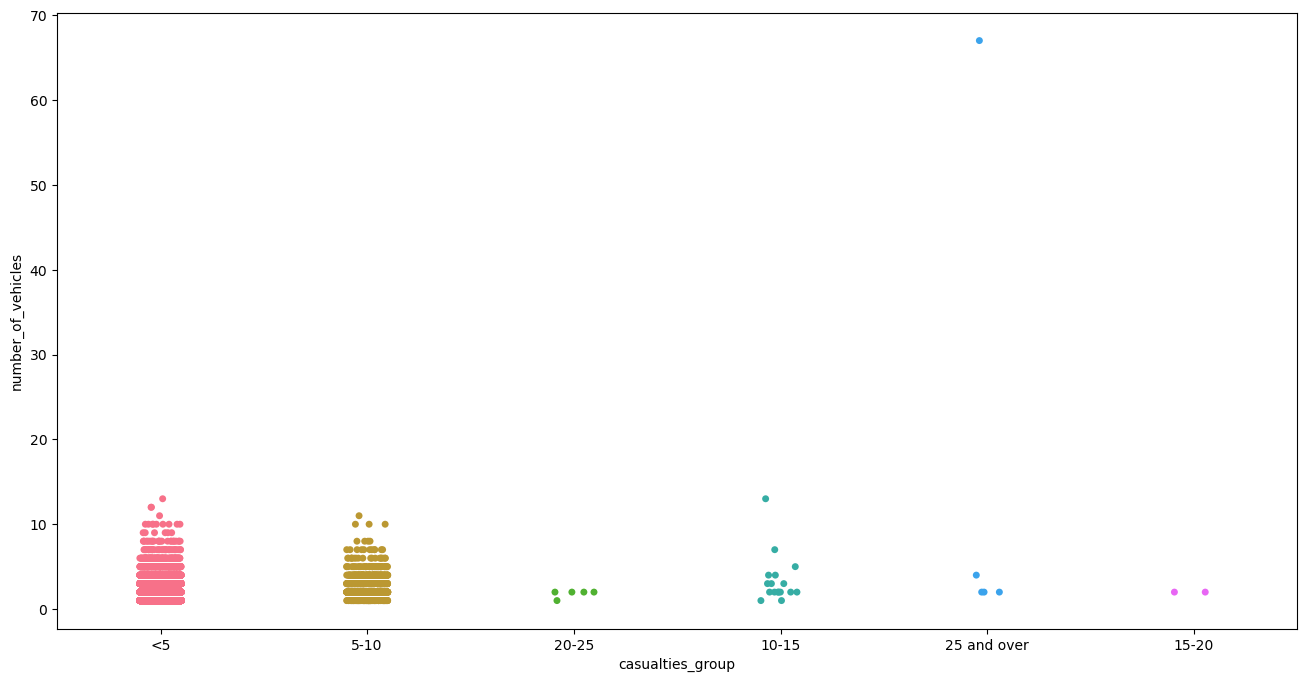

In [104]:
fig, ax = plt.subplots(figsize=(16,8))

sns.stripplot(x="casualties_group", y="number_of_vehicles", data=df, palette="husl")

In [105]:
vehicles = [] # define array structure
for n in df["number_of_vehicles"]:
    if n < 5:
        vehicles.append("<5")
    elif 5 <= n <= 10:
        vehicles.append("5-10")
    elif 10 < n <= 15:
        vehicles.append("10-15")
    elif 15 < n <= 20:
        vehicles.append("15-20")
    elif 20 < n <= 25:
        vehicles.append("20-25")
    else:
        vehicles.append("25 and over")
        
# Copy dataframe to keep original 
df["vehicles_group"] = vehicles

df.head(10)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5
201301BS70010,2013,01BS70010,526460,177470,-0.180217,51.482002,Metropolitan Police,Slight,1,1,2013-09-01,Wednesday,15:25,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,Zebra,Daylight,Raining no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,1002,913,35,<5,<5
201301BS70012,2013,01BS70012,527580,179460,-0.163378,51.499635,Metropolitan Police,Slight,2,1,2013-01-13,Sunday,12:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,4,Dual carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002819,1002,819,2,<5,<5
201301BS70013,2013,01BS70013,526830,178800,-0.174414,51.493872,Metropolitan Police,Slight,1,1,2013-01-15,Tuesday,18:20,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,C,0,Single carriageway,30,More than 4 arms (not roundabout),

<AxesSubplot:xlabel='vehicles_group', ylabel='number_of_casualties'>

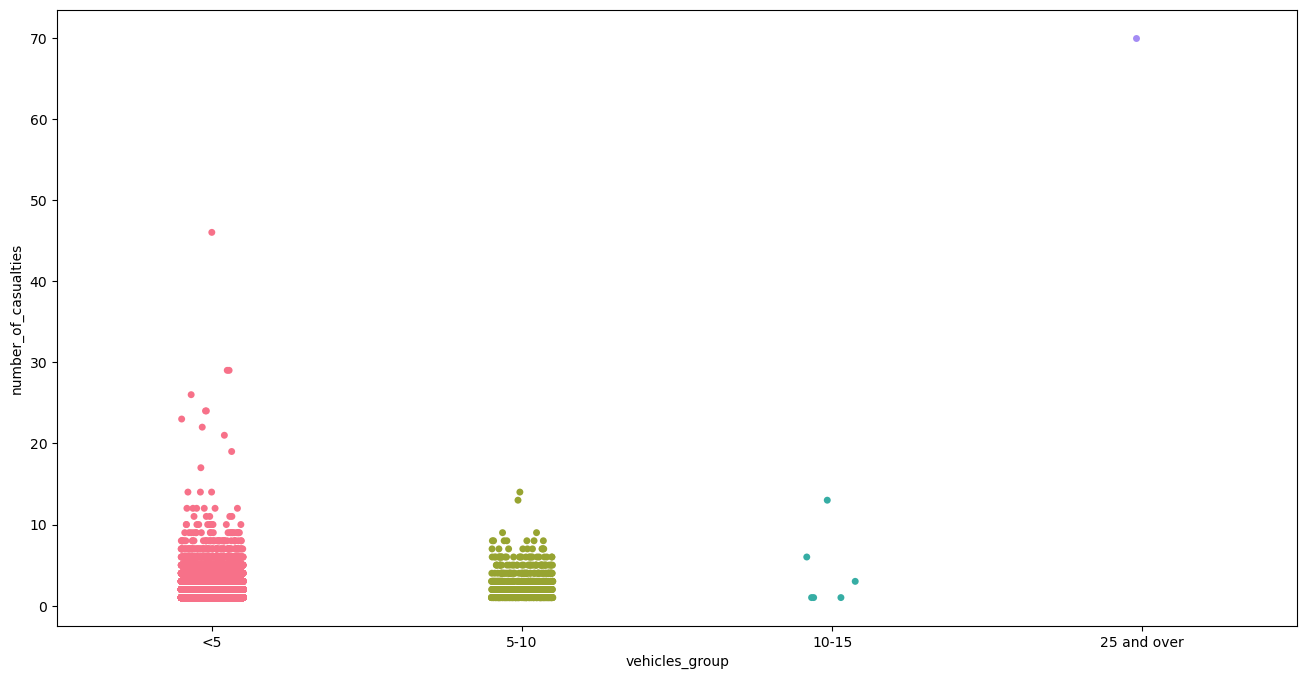

In [106]:
fig, ax = plt.subplots(figsize=(16,8))

sns.stripplot(x="vehicles_group", y="number_of_casualties", data=df, palette="husl")


In [107]:
df_v = df.loc[(df['vehicles_group'] == '10-15') | (df['vehicles_group'] == '25 and over')]
df_v

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201304TA13050,2013,04TA13050,358700,420900,-2.626794,53.682912,Lancashire,Serious,11,6,2013-03-15,Friday,18:07,Chorley,Chorley,Lancashire,Motorway,61,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01024977,1024,977,11,5-10,10-15
201306F080312,2013,06F080312,378780,398630,-2.321254,53.483947,Greater Manchester,Slight,11,1,2013-11-15,Friday,12:52,Salford,Salford,Salford,A,57,Single carriageway,30,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01005720,1005,720,46,<5,10-15
201306X079236,2013,06X079236,385700,408420,-2.217423,53.572179,Greater Manchester,Slight,13,13,2013-10-20,Sunday,15:23,Rochdale,Rochdale,Rochdale,Motorway,62,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,Previous accident,Rural,Yes,Trunk (Roads managed by Highways England),E01005508,1005,508,42,10-15,10-15
201320T014183,2013,20T014183,412630,284900,-1.815547,52.461872,West Midlands,Slight,12,3,2013-11-03,Monday,17:05,Birmingham,Birmingham,Birmingham,A,45,Dual carriageway,40,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Frost or ice,None,None,Urban,Yes,Non-trunk,E01008887,1008,887,44,<5,10-15
2013331302260,2013,331302260,447270,326070,-1.299843,52.830065,Leicestershire,Slight,12,1,2013-06-12,Friday,14:05,North West Leicestershire,North West Leicestershire,Leicestershire,Motorway,1,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01025944,1025,944,24,<5,10-15
2013440258463,2013,440258463,445986,123829,-1.345873,51.011950,Hampshire,Slight,13,1,2013-07-13,Saturday,14:20,Winchester,Winchester,Hampshire,Motorway,3,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01023230,1023,230,28,<5,10-15
2013460234852,2013,460234852,591380,169440,0.749417,51.391660,Kent,Serious,67,70,2013-05-09,Thursday,07:15,Swale,Swale,Kent,A,249,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fog or mist,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01024597,1024,597,19,25 and over,25 and over


In [108]:
vehicles_mean = df_v['number_of_vehicles'].mean()
vehicles_mean

19.857142857142858

In [109]:
x = int(round(vehicles_mean, 0))
x

20

In [110]:
df.loc[(df['vehicles_group'] == '10-15') | (df['vehicles_group'] == '25 and over'), 'number_of_vehicles'] = x
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5


In [111]:
df_c = df.loc[(df['casualties_group'] == '15-20') | (df['casualties_group'] == '25 and over')]
df_c

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201306F070929,2013,06F070929,382170,400330,-2.270266,53.499354,Greater Manchester,Serious,2,29,2013-11-03,Monday,07:45,Salford,Salford,Salford,A,576,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01005611,1005,611,44,25 and over,<5
201306Q074398,2013,06Q074398,393810,405510,-2.094895,53.546183,Greater Manchester,Slight,2,19,2013-06-17,Monday,08:20,Oldham,Oldham,Oldham,Unclassified,0,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01032920,1032,920,25,15-20,<5
2013353140013,2013,353140013,518770,265160,-0.260756,52.271738,Cambridgeshire,Serious,2,46,2013-10-13,Sunday,05:30,Huntingdonshire,Huntingdonshire,Cambridgeshire,A,1,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Raining + high winds,Wet or damp,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01018119,1018,119,41,25 and over,<5
2013400DA0434,2013,400DA0434,500800,233360,-0.533436,51.989513,Bedfordshire,Serious,4,26,2013-06-07,Saturday,16:18,Central Bedfordshire,Central Bedfordshire,Central Bedfordshire,Motorway,1,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01017450,1017,450,23,25 and over,<5
2013460234852,2013,460234852,591380,169440,0.749417,51.391660,Kent,Serious,20,70,2013-05-09,Thursday,07:15,Swale,Swale,Kent,A,249,Dual carriageway,70,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fog or mist,Dry,None,None,Rural,Yes,Trunk (Roads managed by Highways England),E01024597,1024,597,19,25 and over,25 and over
2013553D22763,2013,553D22763,401810,108740,-1.975663,50.878090,Dorset,Fatal,2,29,2013-11-06,Tuesday,08:15,East Dorset,East Dorset,Dorset,B,3078,Single carriageway,60,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,E01020398,1020,398,45,25 and over,<5
201363AC05313,2013,63AC05313,258010,208200,-4.058565,51.754401,Dyfed-Powys,Fatal,2,17,2013-01-29,Tuesday,16:21,Carmarthenshire,Carmarthenshire,Carmarthenshire,A,483,Single carriageway,60,Not at junction or within 20 metres,No junction to control,-1,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,W01000665,1000,665,5,15-20,<5


In [112]:
causalities_mean = df_c['number_of_casualties'].mean()
causalities_mean

33.714285714285715

In [113]:
y = int(round(causalities_mean, 0))
y

34

In [114]:
df.loc[(df['casualties_group'] == '15-20') | (df['casualties_group'] == '25 and over'), 'number_of_casualties'] = y
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5


## Data Transformation

In [115]:
import datetime

df["week_number"] = df["date"].dt.week

In [116]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5,5
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5,14
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5,27
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5,40
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5,14


In [117]:
df['week_number'].unique()

array([ 5, 14, 27, 40, 35,  2,  3, 22,  4, 18,  1, 31,  9, 36, 44, 49, 48,
        7,  8, 23, 11, 12, 13,  6, 10, 15, 45, 16, 17, 32, 20, 21, 25, 24,
       26, 19, 29, 41, 28, 30, 33, 34, 37, 50, 38, 39, 42, 43, 46, 47, 51,
       52])

In [118]:
weeks = [] # define array structure
for n in df["week_number"]:
    if n < 10:
        weeks.append("<10")
    elif 10 <= n <= 20:
        weeks.append("10-20")
    elif 20 < n <= 30:
        weeks.append("20-30")
    elif 30 < n <= 40:
        weeks.append("30-40")
    elif 40 < n <= 50:
        weeks.append("40-50")
    else:
        weeks.append("50-52")
        
# Copy dataframe to keep original 
df["week_number"] = weeks

df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5,<10
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5,10-20
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5,20-30
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5,30-40
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5,10-20


## Encoding

In [119]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing

In [120]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301BS70003,2013,01BS70003,527060,177970,-0.171402,51.486361,Metropolitan Police,Serious,2,1,2013-02-01,Wednesday,09:08,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3217,Single carriageway,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002844,1002,844,5,<5,<5,<10
201301BS70005,2013,01BS70005,526900,178940,-0.173356,51.495115,Metropolitan Police,Slight,1,2,2013-04-01,Friday,08:16,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Crossroads,Auto traffic signal,A,3218,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,None,None,Urban,Yes,Non-trunk,E01002821,1002,821,14,<5,<5,10-20
201301BS70006,2013,01BS70006,524240,181460,-0.210767,51.518353,Metropolitan Police,Slight,1,1,2013-07-01,Monday,11:45,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Give way or uncontrolled,B,412,None within 50 metres,Zebra,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,1002,878,27,<5,<5,20-30
201301BS70007,2013,01BS70007,524320,181290,-0.209675,51.516808,Metropolitan Police,Slight,2,1,2013-10-01,Thursday,10:40,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,450,Single carriageway,30,Crossroads,Auto traffic signal,C,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002831,1002,831,40,<5,<5,30-40
201301BS70009,2013,01BS70009,525450,178660,-0.194332,51.492922,Metropolitan Police,Slight,2,1,2013-04-01,Friday,17:47,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3220,One way street,30,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002851,1002,851,14,<5,<5,10-20


In [121]:
to_be_label_encoded = ['police_force', 'accident_severity', 'local_authority_district', \
                       'local_authority_ons_district', 'local_authority_highway']
to_be_one_hot_encoded = ['day_of_week', 'first_road_class', 'road_type', 'junction_detail',\
                        'junction_control', 'second_road_class', 'pedestrian_crossing_human_control',\
                        'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',\
                        'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', \
                        'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',\
                        'casualties_group', 'vehicles_group', 'week_number']

In [122]:
for i in to_be_label_encoded:
    df['{}_encoded'.format(i)] = preprocessing.LabelEncoder().fit_transform(df[i])

In [123]:
x = pd.get_dummies(df[to_be_one_hot_encoded])

In [124]:
for i in x.columns:
    if i not in df:
        df[i] = x[i]

In [125]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

## Normalization

In [126]:
f_road_z_origin = df.first_road_number
f_road_z_scaled = StandardScaler().fit_transform(df[["first_road_number"]]) # Standardization using StandardScaler

print("Minimum ", min(f_road_z_scaled))
print("Maximum ", max(f_road_z_scaled))

Minimum  [-0.5105783]
Maximum  [5.09159102]


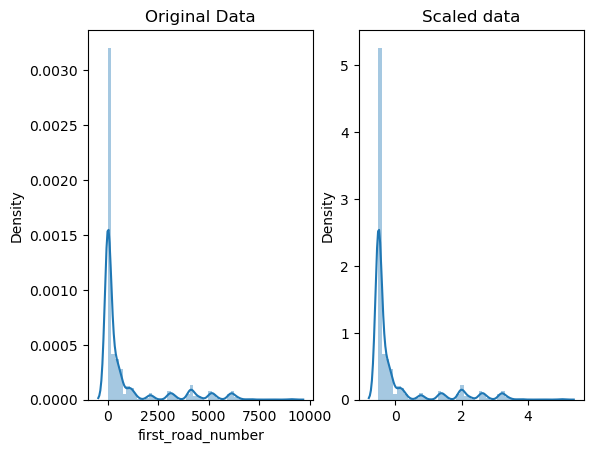

In [127]:
fig, ax=plt.subplots(1,2)
sns.distplot(f_road_z_origin, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(f_road_z_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [128]:
s_road_z_origin = df.second_road_number
s_road_z_scaled = StandardScaler().fit_transform(df[["second_road_number"]]) # Standardization using StandardScaler

print("Minimum ", min(s_road_z_scaled))
print("Maximum ", max(s_road_z_scaled))

Minimum  [-0.24300221]
Maximum  [9.38148668]


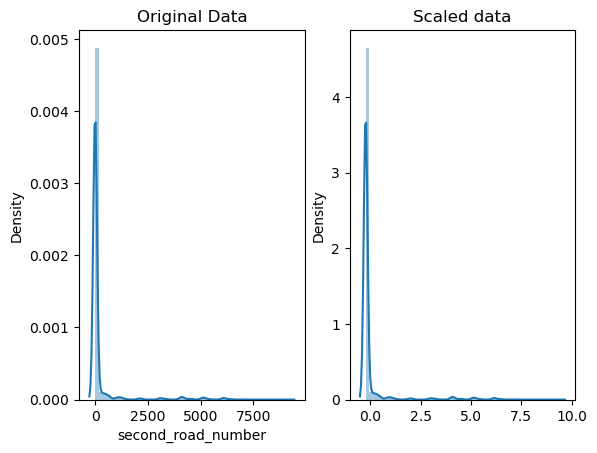

In [129]:
fig, ax=plt.subplots(1,2)
sns.distplot(s_road_z_origin, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(s_road_z_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [130]:
df['scaled_first_road_number'] = f_road_z_scaled
df['scaled_second_road_number'] = s_road_z_scaled

In [131]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

## Adding Columns

In [132]:
df_hour = pd.to_datetime(df['time'], format='%H:%M').dt.hour

In [133]:
df_hour.values

array([ 9,  8, 11, ..., 10, 13, 20])

In [134]:
df_am_arr = []
for i in df_hour.values:
    if 0 <= i < 12:
        df_am_arr.append('AM')
    elif 12 <= i < 24:
        df_am_arr.append('PM')
    else:
        df_am_arr.append('Invalid')
        
df['AM/PM'] = df_am_arr

In [135]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

In [136]:
df['Weekend or not'] = df['day_of_week'].map({'Saturday': 'Yes',
                                              'Sunday': 'Yes',
                                              'Monday': 'No',
                                              'Tuesday': 'No',
                                              'Wednesday': 'No',
                                              'Thursday': 'No',
                                              'Friday': 'No'})

In [137]:
df.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

Two other columns were added above in Q3: 'number_of_residents' and 'number_of_households'

## Saving new csv file with preprocessed data

In [138]:
df.to_csv('2013_Aciidents_UK_Preprocessed.csv')

## Data Integration

For this step, we are going to integrate the vehicles information dataset found on kaggle through the following link: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles

In [139]:
df2 = pd.read_csv('Vehicle_Information.csv', encoding= 'unicode_escape')

In [140]:
df2.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [141]:
df2 = df2[df2['Year'] == 2013]

In [142]:
df2.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
1312882,201301BS70003,46 - 55,10.0,Urban area,8.0,2402.0,None,None,Journey as part of work,Cleared junction or waiting/parked at junction...,LONDON TAXIS INT,TXII SILVER AUTO,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Front,2013
1312883,201301BS70005,26 - 35,5.0,Urban area,4.0,124.0,None,None,Not known,Approaching junction or waiting/parked at junc...,PIAGGIO,VESPA LX 125,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2013
1312884,201301BS70006,46 - 55,NaN,Urban area,1.0,NaN,None,None,Journey as part of work,Approaching junction or waiting/parked at junc...,MAZDA,6 VENTURE EDITION D,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Overtaking static vehicle - offside,1,Bus or coach (17 or more pass seats),No,Did not impact,2013
1312885,201301BS70007,36 - 45,7.0,Urban area,4.0,124.0,None,None,Not known,Mid Junction - on roundabout or on main road,PIAGGIO,VESPA LX 125,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Motorcycle 125cc and under,No,Nearside,2013
1312886,201301BS70007,36 - 45,10.0,Urban area,4.0,1985.0,None,None,Not known,Mid Junction - on roundabout or on main road,SAAB,9-3 SE TURBO,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Did not impact,2013


In [143]:
df2.shape

(171625, 24)

we will need just these 3 columns: Accident_Index, Age_Band_of_Driver, Sex_of_Driver.

In [144]:
df2_required = df2[['Accident_Index', 'Age_Band_of_Driver']]

In [145]:
df2_required = df2_required.drop_duplicates(subset='Accident_Index', keep=False)

In [146]:
df2_required.shape

(65663, 2)

In [147]:
df2_required.head()

,Accident_Index,Age_Band_of_Driver
1312882,201301BS70003,46 - 55
1312883,201301BS70005,26 - 35
1312884,201301BS70006,46 - 55
1312889,201301BS70010,Data missing or out of range
1312892,201301BS70018,36 - 45


Performing inner join between the 2 datasets.

In [148]:
df2_required.set_index('Accident_Index')

,Age_Band_of_Driver
Accident_Index,
201301BS70003,46 - 55
201301BS70005,26 - 35
201301BS70006,46 - 55
201301BS70010,Data missing or out of range
201301BS70018,36 - 45
...,...
2013984138613,46 - 55
2013984138913,46 - 55
2013984139913,36 - 45


In [149]:
df3 = pd.merge(df, df2_required, how="inner", left_on="accident_index", right_on="Accident_Index")

In [150]:
df3.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

In [151]:
df3.set_index('Accident_Index')

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,number_of_residents,number_of_households,accident_week_number,casualties_group,vehicles_group,week_number,police_force_encoded,accident_severity_encoded,local_authority_district_encoded,local_authority_ons_district_encoded,local_authority_highway_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No junction to control,junction_control_Stop sign,second_road_class_-1,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_None,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_None,carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,urban_or_rural_area_Rural,urban_or_rural_area_Urba

In [152]:
df3.isna().sum()

accident_year                0
accident_reference           0
location_easting_osgr        0
location_northing_osgr       0
longitude                    0
                            ..
scaled_second_road_number    0
AM/PM                        0
Weekend or not               0
Accident_Index               0
Age_Band_of_Driver           0
Length: 154, dtype: int64

In [153]:
df3.drop(['accident_year'], axis=1, inplace=True)

In [154]:
df3.Age_Band_of_Driver.value_counts()

26 - 35                         13191
36 - 45                         12270
46 - 55                         11270
21 - 25                          7621
56 - 65                          6614
16 - 20                          5238
Data missing or out of range     4034
66 - 75                          3293
Over 75                          2118
11 - 15                            11
6 - 10                              1
Name: Age_Band_of_Driver, dtype: int64

In [155]:
df3['Age_Band_of_Driver'].replace('Data missing or out of range', np.nan, inplace=True)

In [156]:
percentage_nan_age = (df3['Age_Band_of_Driver'].isna().sum()/df3.shape[0]) * 100

In [157]:
percentage_nan_age #less than 10% of data, then we will drop nan values.

6.143677373174334

In [158]:
df3.dropna(subset=['Age_Band_of_Driver'], inplace=True)

In [159]:
df3.shape

(61627, 153)

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
lbl_encoder = LabelEncoder()

In [162]:
df3['Age_Band_of_Driver'] = lbl_encoder.fit_transform(df3['Age_Band_of_Driver'])

In [163]:
df3['Age_Band_of_Driver'].value_counts()

3    13191
4    12270
5    11270
2     7621
6     6614
1     5238
8     3293
9     2118
0       11
7        1
Name: Age_Band_of_Driver, dtype: int64

<table>
    <tr>
        <td>Original Age Band</td>
        <td>Encoded Age Band</td>
    </tr>
    <tr>
        <td>11 - 15</td>
        <td>0</td>
    </tr>
    <tr>
        <td>16 - 20</td>
        <td>1</td>
    </tr>
    <tr>
        <td>21 - 25</td>
        <td>2</td>
    </tr>
    <tr>
        <td>26 - 35</td>
        <td>3</td>
    </tr>
    <tr>
        <td>36 - 45</td>
        <td>4</td>
    </tr>
    <tr>
        <td>46 - 55</td>
        <td>5</td>
    <tr>
        <td>56 - 65</td>
        <td>6</td>
    </tr>
    <tr>
        <td>6 - 10</td>
        <td>7</td>
    </tr>
    <tr>
        <td>66 - 75</td>
        <td>8</td>
    </tr>
    <tr>
        <td>Over 75</td>
        <td>9</td>
    </tr>
</table>

In [164]:
df3['Age_Band_of_Driver'] = df3['Age_Band_of_Driver'].astype(int)

### Q1- Are there any illegal drivers in UK ?

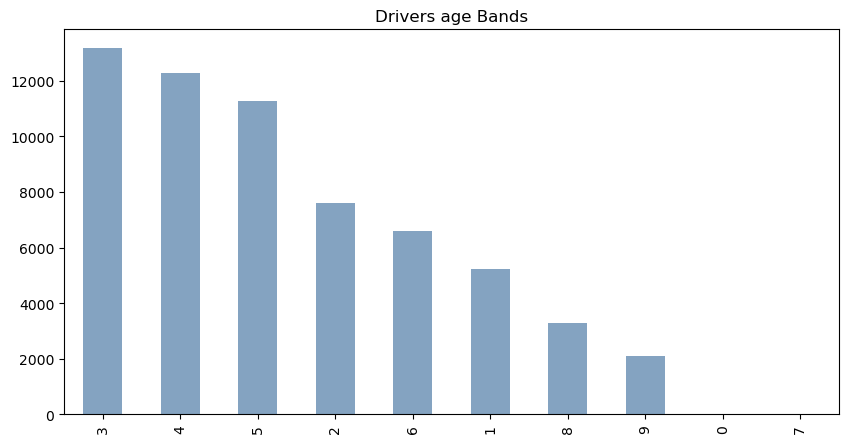

In [165]:
df3['Age_Band_of_Driver'].value_counts().plot(kind ='bar', figsize=(10,5), title='Drivers age Bands', color=(0.2, 0.4, 0.6, 0.6))
plt.show()

There are two age band categories which are 0 & 7. These correspond to age bands less than 17 years old which is not legal in UK.

### Q2- Is there a relation between the accident severity and the age band of drivers being less experienced in driving?

<AxesSubplot:xlabel='Age_Band_of_Driver'>

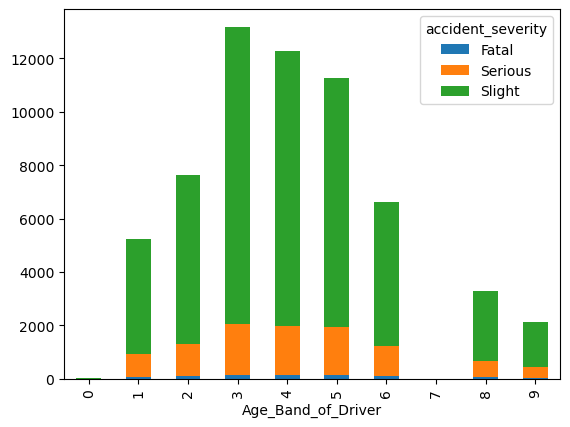

In [166]:
pd.crosstab(df3['Age_Band_of_Driver'], df3['accident_severity']).plot(kind='bar', stacked=True)

## Saving to CSV file

In [167]:
df3.to_csv('2013_Aciidents_UK_Last.csv')